In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.shape



(284807, 31)

In [8]:
print("number of rows =",data.shape[0])
print("number of columns =",data.shape[1])

number of rows = 284807
number of columns = 31


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [13]:
# separating the data for analysis
normal = data[data.Class == 0]
fraud = data[data.Class == 1]

print('normal credit card ' ,normal.shape)
print('fraud credit card ',fraud.shape)

normal credit card  (284315, 31)
fraud credit card  (492, 31)


In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [62]:
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [63]:
data = data.drop(['Time'],axis=1)
data.shape


(284807, 30)

In [64]:
data.duplicated().any()

True

In [65]:
data = data.drop_duplicates()
data.shape


(275663, 30)

In [66]:
284807 - 275663

9144

In [67]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [69]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

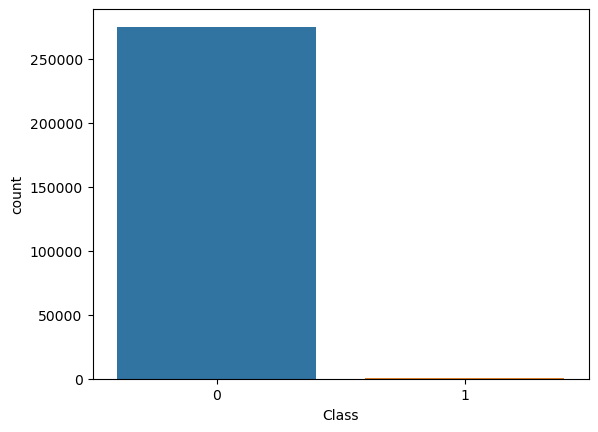

In [70]:
sns.countplot(data['Class'])

In [109]:
normal_sample = normal.sample(n=473)

In [110]:
normal_sample.shape

(473, 31)

In [111]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [112]:
new_data['Class'].value_counts()

1    492
0    473
Name: Class, dtype: int64

In [113]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,138751.0,1.871805,0.523178,0.325290,3.794805,-0.058571,0.219240,-0.268973,0.002512,-0.730307,...,-0.175720,-0.387723,0.428308,-0.055861,-0.519328,-0.383361,0.025915,-0.022317,0.00,0
1,113152.0,0.011233,0.848762,-0.209340,-0.718574,1.235726,0.169417,0.962391,-0.168616,0.126168,...,0.321043,1.237109,-0.348679,-0.104034,-0.382863,-0.442356,0.187006,0.047208,1.00,0
2,59265.0,-0.972329,0.033085,1.184387,-0.289441,0.673388,-0.308410,-0.046665,-0.002786,-0.390403,...,-0.008883,-0.017071,-0.076069,-0.440697,-0.725632,0.880432,-0.162317,0.259061,23.91,0
3,50812.0,-1.369752,0.386072,1.412557,-1.889001,0.461045,-0.785726,0.662449,-0.154081,1.043726,...,-0.075658,0.182109,-0.300980,-0.093149,0.785450,-0.739264,-0.109657,0.018900,19.00,0
4,154160.0,-0.199524,1.257229,-0.825794,-0.520650,0.621299,-0.819351,0.638342,0.324652,-0.201162,...,-0.302136,-0.872313,0.158720,0.469112,-0.380654,0.121435,0.093410,0.020804,12.48,0


In [114]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96411.771670,0.224225,-0.032654,0.005710,0.007126,-0.032050,0.010659,0.011933,-0.022692,0.019312,...,-0.024652,0.014691,-0.016566,-0.012254,0.006559,0.016544,0.003307,-0.003195,0.022760,84.057822
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [115]:
X = new_data.drop('Class',axis=1)
y= new_data ['Class']


In [116]:
print (X)

         Time        V1        V2        V3        V4        V5        V6  \
0    138751.0  1.871805  0.523178  0.325290  3.794805 -0.058571  0.219240   
1    113152.0  0.011233  0.848762 -0.209340 -0.718574  1.235726  0.169417   
2     59265.0 -0.972329  0.033085  1.184387 -0.289441  0.673388 -0.308410   
3     50812.0 -1.369752  0.386072  1.412557 -1.889001  0.461045 -0.785726   
4    154160.0 -0.199524  1.257229 -0.825794 -0.520650  0.621299 -0.819351   
..        ...       ...       ...       ...       ...       ...       ...   
960  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
961  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
962  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
963  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
964  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

           V7        V8        V9  ...       V20       V21       V22  \
0  

In [117]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
960    1
961    1
962    1
963    1
964    1
Name: Class, Length: 965, dtype: int64


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , stratify=y , random_state=2)

In [120]:
print(X.shape, X_train.shape, X_test.shape)

(965, 30) (772, 30) (193, 30)


In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log = LogisticRegression()

In [123]:
log.fit(X_train,y_train)

LogisticRegression()

In [124]:
y_pred1 = log.predict(X_train)

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
training_data_accuracy = accuracy_score(y_pred1,y_train)

In [127]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9455958549222798


In [128]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [129]:
X_test_prediction = log.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)


In [130]:
print('Accuracy  on Test Data  : ', test_data_accuracy)

Accuracy  on Test Data  :  0.9481865284974094


In [131]:
precision_score(X_test_prediction, y_test)

0.9285714285714286

In [132]:
recall_score(X_test_prediction, y_test)

0.9680851063829787

In [133]:
f1_score(X_test_prediction, y_test)

0.9479166666666666

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)



DecisionTreeClassifier()

In [135]:
y_pred2 = dt.predict(X_test)

In [136]:
accuracy_score(y_test,y_pred2)

0.9119170984455959

In [137]:
precision_score(y_test,y_pred2)

0.900990099009901

In [138]:
recall_score(y_test,y_pred2)

0.9285714285714286

In [139]:
f1_score(y_test,y_pred2)

0.914572864321608